In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Separating electricity data from the full dataframe

In [76]:
df = pd.read_csv("../../data/preprocessed/electricity_weather.csv",delimiter=',',encoding='UTF-8')
elec_data  = df[['timestamp', 'electricity']].copy()
print(elec_data)

                 timestamp  electricity
0      2021-06-14 00:15:00         3.29
1      2021-06-14 00:30:00         3.28
2      2021-06-14 00:45:00         3.25
3      2021-06-14 01:00:00         3.23
4      2021-06-14 01:15:00         3.26
...                    ...          ...
19291  2021-12-31 23:00:00         0.99
19292  2021-12-31 23:15:00         0.98
19293  2021-12-31 23:30:00         0.95
19294  2021-12-31 23:45:00         0.95
19295  2022-01-01 00:00:00         0.95

[19296 rows x 2 columns]


Plotting electricity usage
Observations:
    1. steady energy usage at around 3.5kW during summer months
    2. lots of zero values (likely false)
    3. high peak electricity use during winter months, as expected
    4. upon visual inspection, no obvious anomalies


([<matplotlib.axis.XTick at 0x150a676a0>,
 [Text(0, 0, 'June'),
  Text(1632, 0, 'July'),
  Text(4608, 0, 'August'),
  Text(7584, 0, 'September'),
  Text(10464, 0, 'October'),
  Text(13440, 0, 'November'),
  Text(16320, 0, 'December'),
  Text(19294, 0, 'January')])

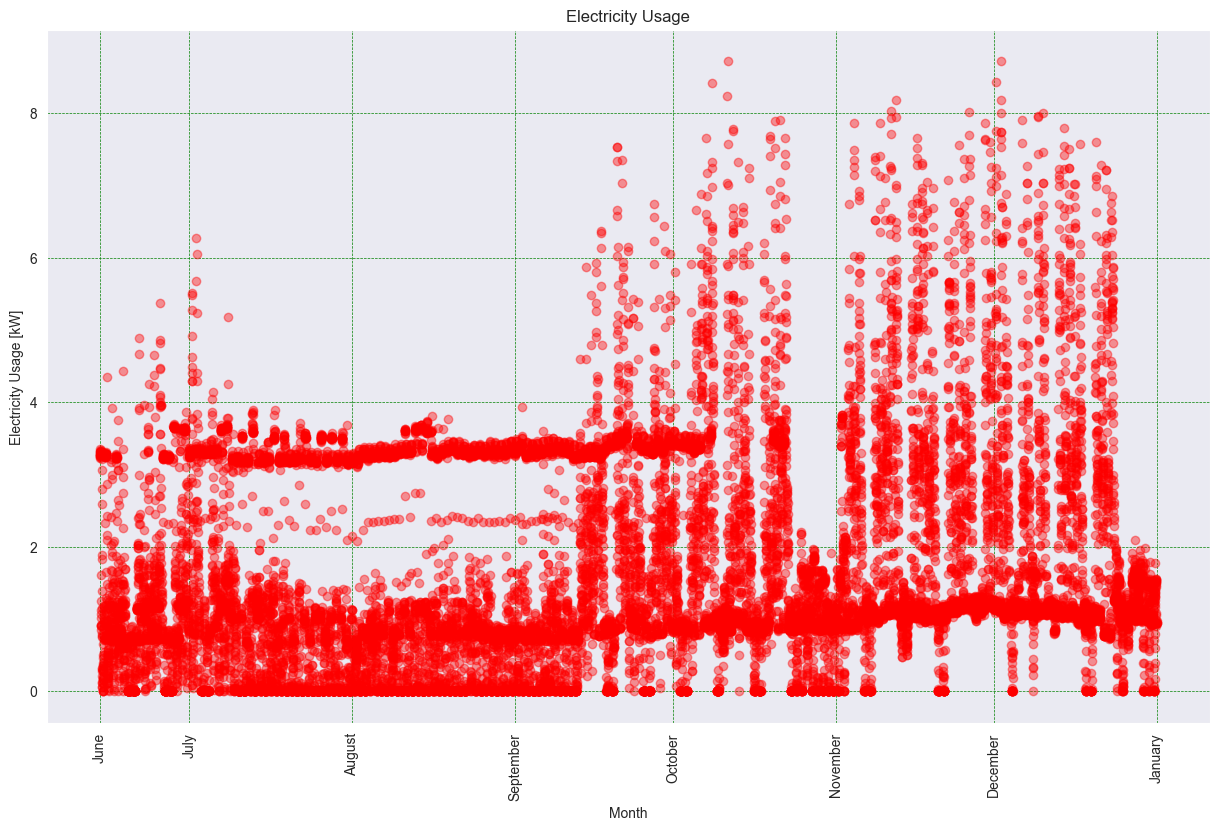

In [77]:
fig = plt.figure(figsize=(15,9))
plt.scatter(elec_data.index,elec_data['electricity'],alpha=0.4,color="red")
plt.grid()
plt.title("Electricity Usage")
plt.xlabel('Month')
plt.ylabel("Electricity Usage [kW]")
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.xticks([0,1632,4608,7584,10464,13440,16320,19294,], ['June','July','August','September','October','November','December', 'January'],rotation=90)

Plot of Energy Usage in October
Observations:
    1. spikes of 5 indicate weekdays
    2. 0 values seem to have some sort of pattern, indicating it is not random sensor error
        - occur on weekends and holidays - maybe sensors get turned off at a certain times

2976 datapoint in October
96 datapoints/day
672 datapoints = week


                 timestamp  electricity
10464  2021-10-01 00:15:00         3.41
10465  2021-10-01 00:30:00         3.44
10466  2021-10-01 00:45:00         3.46
10467  2021-10-01 01:00:00         3.45
10468  2021-10-01 01:15:00         3.42
...                    ...          ...
13435  2021-10-31 23:00:00         0.88
13436  2021-10-31 23:15:00         0.86
13437  2021-10-31 23:30:00         0.95
13438  2021-10-31 23:45:00         0.90
13439  2021-11-01 00:00:00         0.91

[2976 rows x 2 columns]


([<matplotlib.axis.XTick at 0x150ad3190>,
 [Text(10464, 0, 'Oct 1'),
  Text(11136, 0, 'Oct 8'),
  Text(11808, 0, 'Oct 15'),
  Text(12480, 0, 'Oct 22'),
  Text(13152, 0, 'Oct 29')])

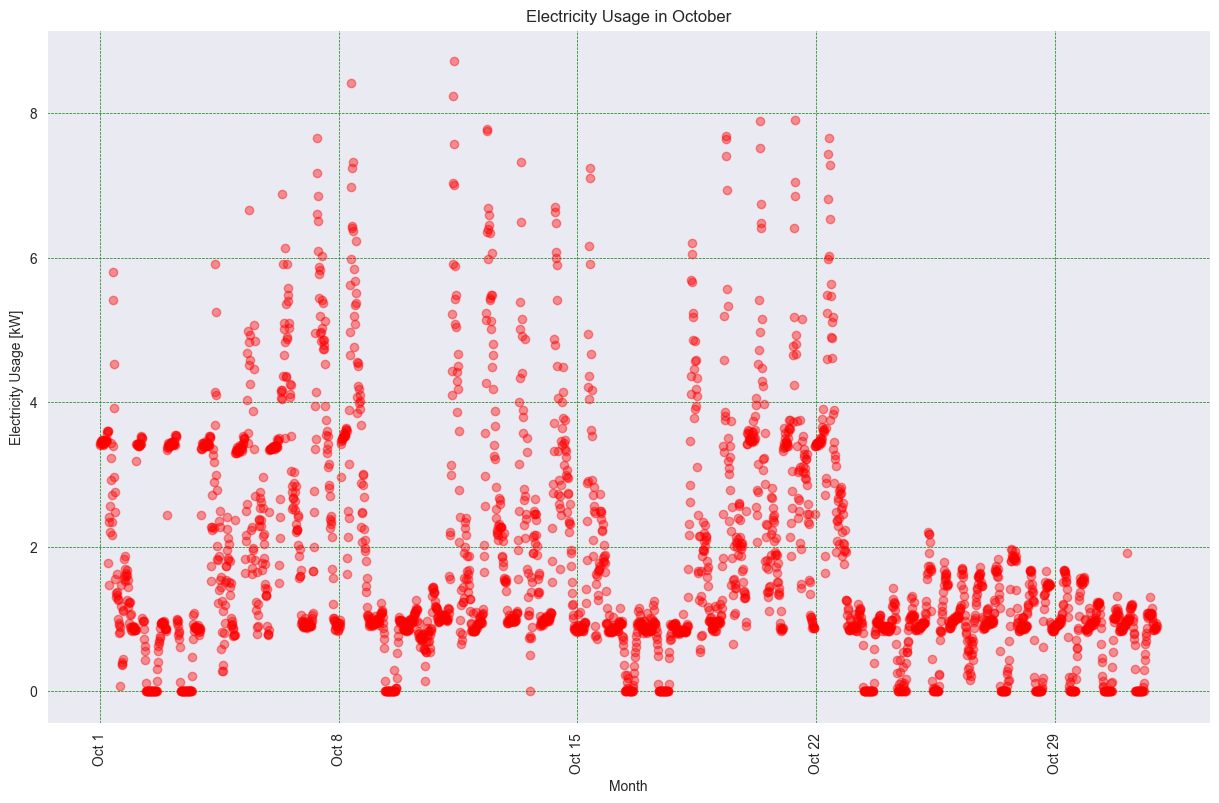

In [78]:
elec_data_oct=elec_data.iloc[10464:13440]
print(elec_data_oct)
fig = plt.figure(figsize=(15,9))
plt.scatter(elec_data_oct.index,elec_data_oct['electricity'],alpha=0.4,color="red")
plt.grid()
plt.title("Electricity Usage in October")
plt.xlabel('Month')
plt.ylabel("Electricity Usage [kW]")
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.xticks([10464,11136,11808,12480,13152], ['Oct 1','Oct 8','Oct 15','Oct 22','Oct 29'],rotation=90)

Histogram of Electricity Usage
Observations:
    1. bimodal distribution, indicating summer and winter electricity usage patterns
    2. 0 values are frequent

Text(0.5, 1.0, 'Electricity Usage Histogram')

<Figure size 640x480 with 0 Axes>

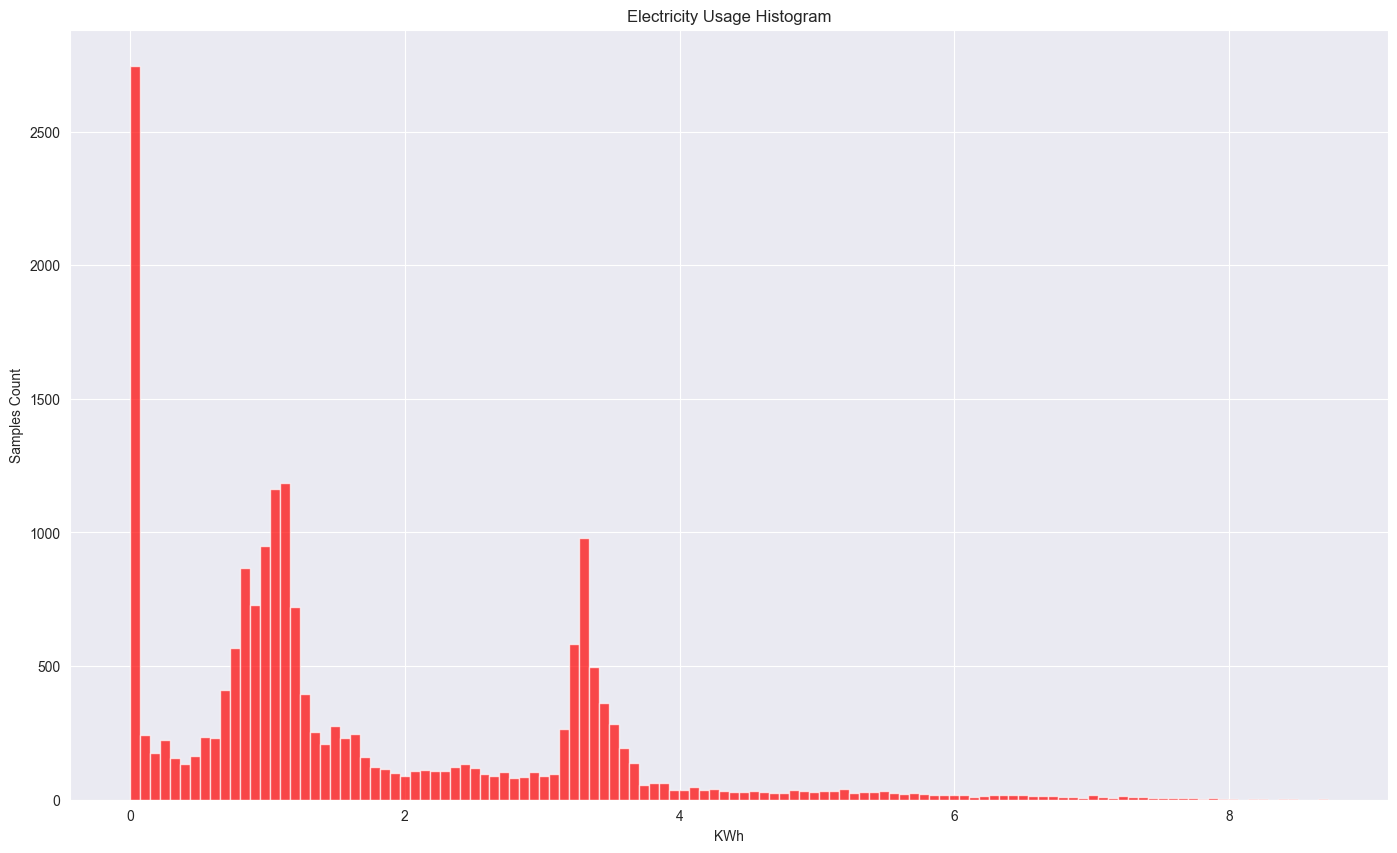

In [79]:
plt.figure()
plt.figure(figsize=(17, 10))
plt.hist(elec_data['electricity'], bins=120,color='red',alpha=0.7)
plt.xlabel("KWh")
plt.ylabel("Samples Count")
plt.grid('--')
plt.title("Electricity Usage Histogram")

Separating cooling data from the full dataframe

In [80]:
df = pd.read_csv("../../data/preprocessed/fbh_kalte_weather.csv",delimiter=',',encoding='UTF-8')
cool_data  = df[['timestamp', 'fbh_kalte']].copy()
print(cool_data)

                 timestamp  fbh_kalte
0      2021-06-14 00:15:00        0.0
1      2021-06-14 00:30:00        0.0
2      2021-06-14 00:45:00        0.0
3      2021-06-14 01:00:00        0.0
4      2021-06-14 01:15:00        0.0
...                    ...        ...
39600  2022-07-31 12:15:00        6.0
39601  2022-07-31 12:30:00        5.0
39602  2022-07-31 12:45:00        5.0
39603  2022-07-31 13:00:00        5.0
39604  2022-07-31 13:15:00        6.0

[39605 rows x 2 columns]


Cooling Data
Observations:
    1. hottest months use most cooling
    2. no visible outliers
    3. 0 values are reasonable

([<matplotlib.axis.XTick at 0x150e6be50>,
 [Text(0, 0, 'June'),
  Text(1632, 0, 'July'),
  Text(4608, 0, 'August'),
  Text(7584, 0, 'September'),
  Text(10464, 0, 'October'),
  Text(13440, 0, 'November'),
  Text(16320, 0, 'December'),
  Text(19294, 0, 'January'),
  Text(22272, 0, 'February'),
  Text(24960, 0, 'March'),
  Text(27936, 0, 'April'),
  Text(30816, 0, 'May'),
  Text(33792, 0, 'June'),
  Text(36672, 0, 'July')])

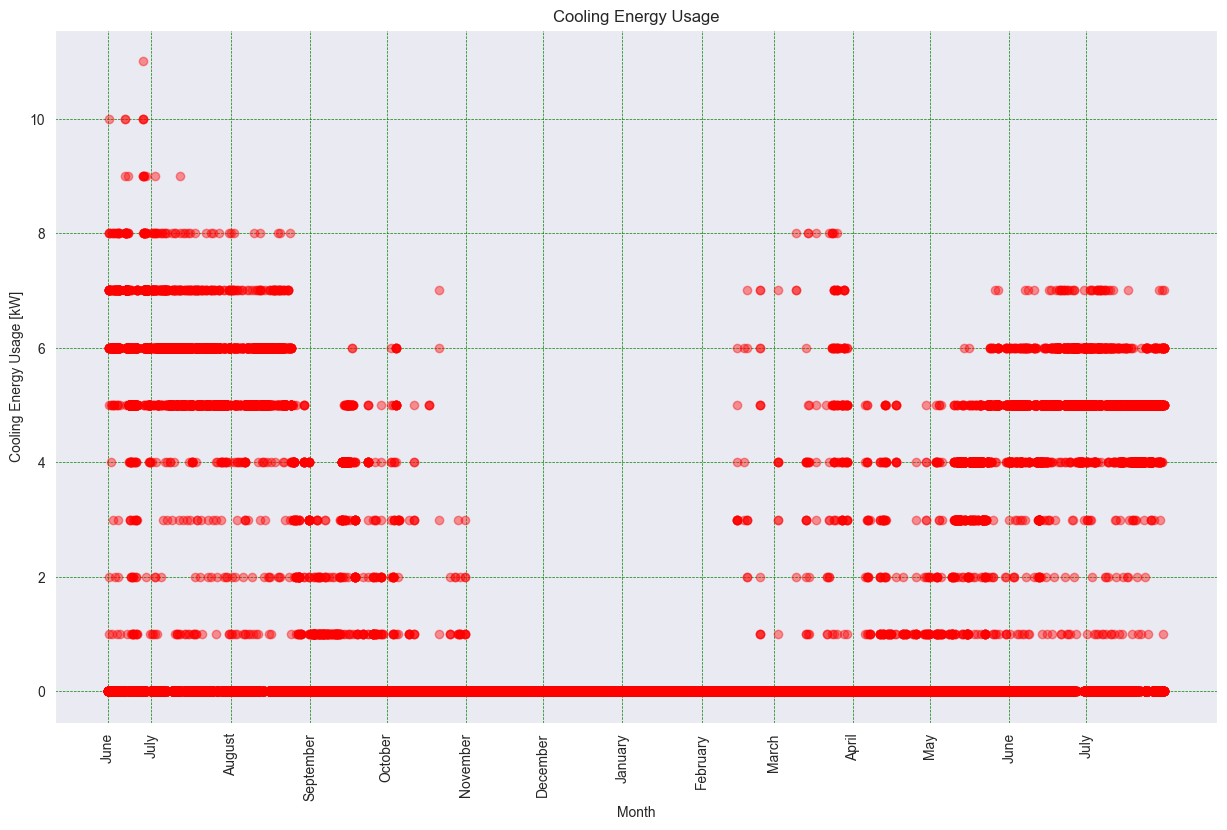

In [81]:
fig = plt.figure(figsize=(15,9))
plt.scatter(cool_data.index,cool_data['fbh_kalte'],alpha=0.4,color="red")
plt.grid()
plt.title("Cooling Energy Usage")
plt.xlabel('Month')
plt.ylabel("Cooling Energy Usage [kW]")
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.xticks([0,1632,4608,7584,10464,13440,16320,19294,22272,24960,27936,30816,33792,36672 ], ['June','July','August','September','October','November','December', 'January', 'February', 'March', 'April', 'May','June','July'],rotation=90)

Cooling Data - October
Observations:
    1. data vaguely corresponds to weekdays

                 timestamp  fbh_kalte
10464  2021-10-01 00:15:00        0.0
10465  2021-10-01 00:30:00        0.0
10466  2021-10-01 00:45:00        0.0
10467  2021-10-01 01:00:00        0.0
10468  2021-10-01 01:15:00        0.0
...                    ...        ...
13435  2021-10-31 23:00:00        0.0
13436  2021-10-31 23:15:00        0.0
13437  2021-10-31 23:30:00        0.0
13438  2021-10-31 23:45:00        0.0
13439  2021-11-01 00:00:00        0.0

[2976 rows x 2 columns]


([<matplotlib.axis.XTick at 0x1515cd070>,
 [Text(10464, 0, 'Oct 1'),
  Text(11136, 0, 'Oct 8'),
  Text(11808, 0, 'Oct 15'),
  Text(12480, 0, 'Oct 22'),
  Text(13152, 0, 'Oct 29')])

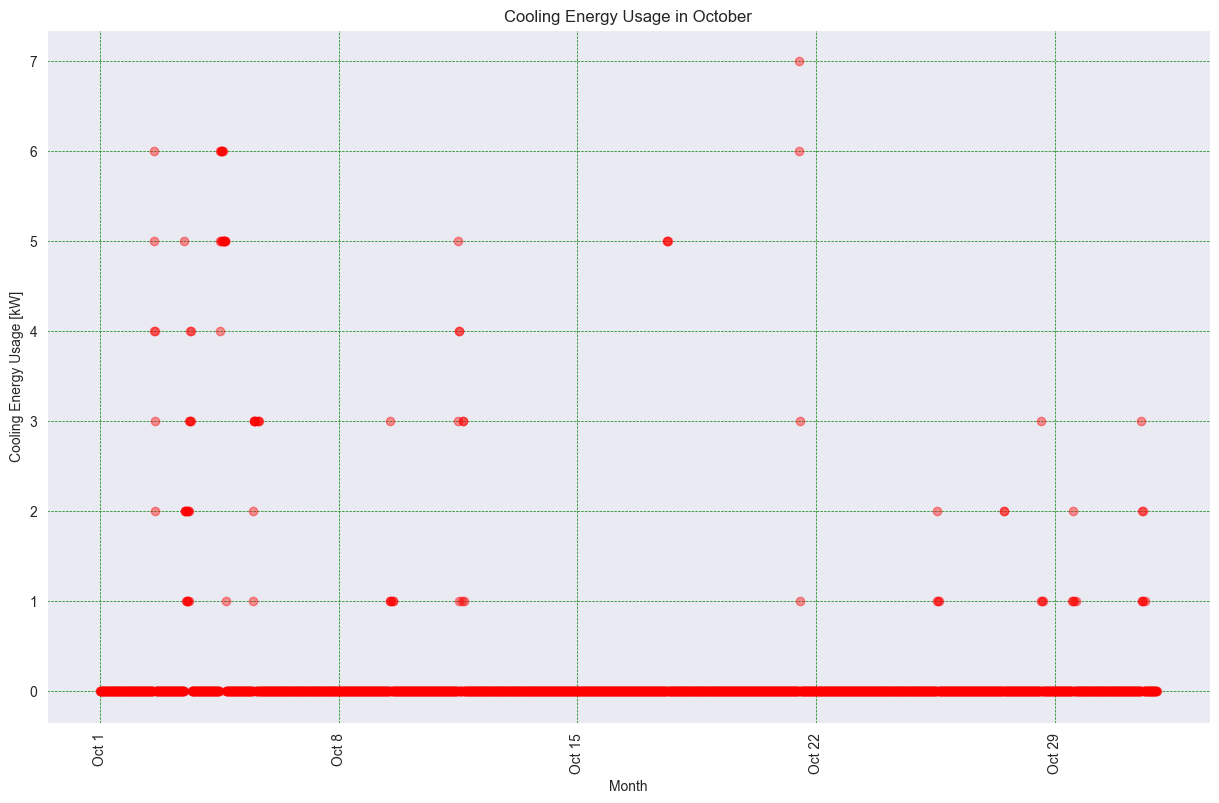

In [82]:
cool_data_oct=cool_data.iloc[10464:13440]
print(cool_data_oct)
fig = plt.figure(figsize=(15,9))
plt.scatter(cool_data_oct.index,cool_data_oct['fbh_kalte'],alpha=0.4,color="red")
plt.grid()
plt.title("Cooling Energy Usage in October")
plt.xlabel('Month')
plt.ylabel("Cooling Energy Usage [kW]")
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.xticks([10464,11136,11808,12480,13152], ['Oct 1','Oct 8','Oct 15','Oct 22','Oct 29'],rotation=90)

Histogram of Cooling Data
Observations:
    1. 0 values are reasonable

Text(0.5, 1.0, 'Cooling Energy Usage Histogram')

<Figure size 640x480 with 0 Axes>

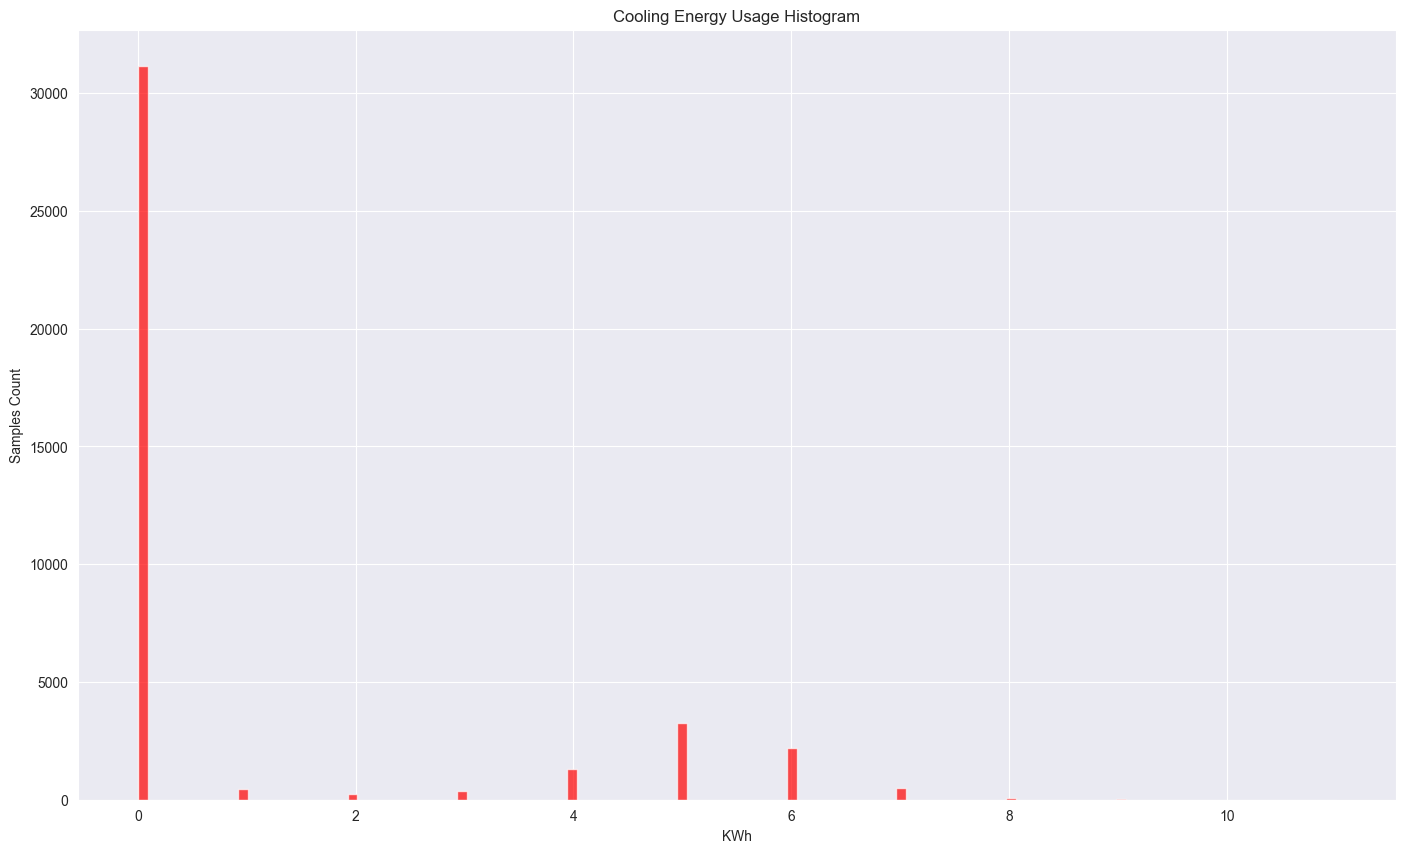

In [83]:
plt.figure()
plt.figure(figsize=(17, 10))
plt.hist(cool_data['fbh_kalte'], bins=120,color='red',alpha=0.7)
plt.xlabel("KWh")
plt.ylabel("Samples Count")
plt.grid('--')
plt.title("Cooling Energy Usage Histogram")

Separating heating data from the full dataframe

In [84]:
df = pd.read_csv("../../data/preprocessed/fbh_warme_weather.csv",delimiter=',',encoding='UTF-8')
warm_data  = df[['timestamp', 'fbh_warme']].copy()
print(warm_data)

                 timestamp  fbh_warme
0      2021-06-14 00:15:00        0.0
1      2021-06-14 00:30:00        0.0
2      2021-06-14 00:45:00        0.0
3      2021-06-14 01:00:00        0.0
4      2021-06-14 01:15:00        1.0
...                    ...        ...
39600  2022-07-31 12:15:00        0.0
39601  2022-07-31 12:30:00        0.0
39602  2022-07-31 12:45:00        0.0
39603  2022-07-31 13:00:00        0.0
39604  2022-07-31 13:15:00        0.0

[39605 rows x 2 columns]


Heating Data
Observations:
    1. coldest months use most heating
    2. strange uptick in June
    3. possible outlier in November
    4. 0 values are reasonable

([<matplotlib.axis.XTick at 0x151a9d4f0>,
 [Text(0, 0, 'June'),
  Text(1632, 0, 'July'),
  Text(4608, 0, 'August'),
  Text(7584, 0, 'September'),
  Text(10464, 0, 'October'),
  Text(13440, 0, 'November'),
  Text(16320, 0, 'December'),
  Text(19294, 0, 'January'),
  Text(22272, 0, 'February'),
  Text(24960, 0, 'March'),
  Text(27936, 0, 'April'),
  Text(30816, 0, 'May'),
  Text(33792, 0, 'June'),
  Text(36672, 0, 'July')])

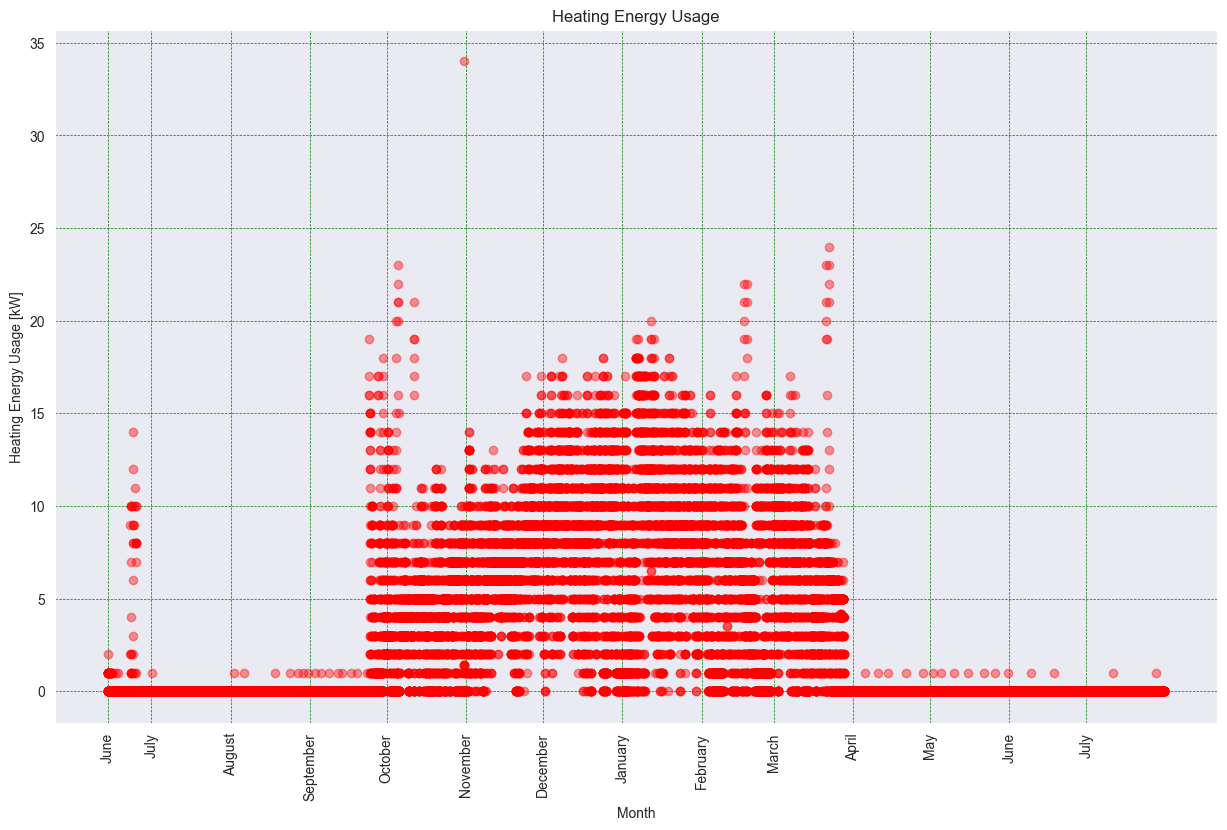

In [85]:
fig = plt.figure(figsize=(15,9))
plt.scatter(warm_data.index,warm_data['fbh_warme'],alpha=0.4,color="red")
plt.grid()
plt.title("Heating Energy Usage")
plt.xlabel('Month')
plt.ylabel("Heating Energy Usage [kW]")
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.xticks([0,1632,4608,7584,10464,13440,16320,19294,22272,24960,27936,30816,33792,36672 ], ['June','July','August','September','October','November','December', 'January', 'February', 'March', 'April', 'May','June','July'],rotation=90)

Heating Data - October
Observations:
    1. heating turned on during weekends
        -base level of heating always on?

                 timestamp  fbh_warme
10464  2021-10-01 00:15:00        3.0
10465  2021-10-01 00:30:00        2.0
10466  2021-10-01 00:45:00        4.0
10467  2021-10-01 01:00:00        3.0
10468  2021-10-01 01:15:00        4.0
...                    ...        ...
13435  2021-10-31 23:00:00        7.0
13436  2021-10-31 23:15:00        7.0
13437  2021-10-31 23:30:00        6.0
13438  2021-10-31 23:45:00        7.0
13439  2021-11-01 00:00:00        7.0

[2976 rows x 2 columns]


([<matplotlib.axis.XTick at 0x151b13550>,
 [Text(10464, 0, 'Oct 1'),
  Text(11136, 0, 'Oct 8'),
  Text(11808, 0, 'Oct 15'),
  Text(12480, 0, 'Oct 22'),
  Text(13152, 0, 'Oct 29')])

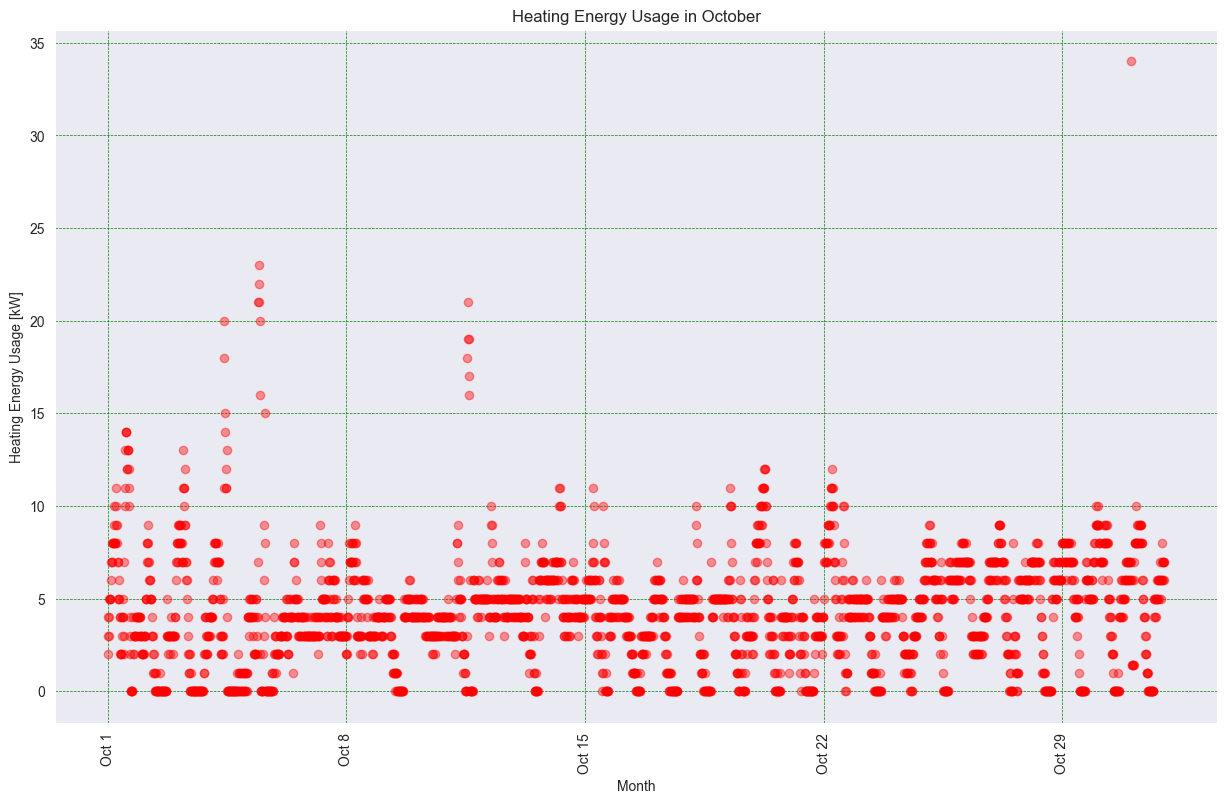

In [86]:
warm_data_oct=warm_data.iloc[10464:13440]
print(warm_data_oct)
fig = plt.figure(figsize=(15,9))
plt.scatter(warm_data_oct.index,warm_data_oct['fbh_warme'],alpha=0.4,color="red")
plt.grid()
plt.title("Heating Energy Usage in October")
plt.xlabel('Month')
plt.ylabel("Heating Energy Usage [kW]")
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.xticks([10464,11136,11808,12480,13152], ['Oct 1','Oct 8','Oct 15','Oct 22','Oct 29'],rotation=90)

Histogram of Heating Data
Observations:
    1. 0 values are reasonable

Text(0.5, 1.0, 'Heating Energy Usage Histogram')

<Figure size 640x480 with 0 Axes>

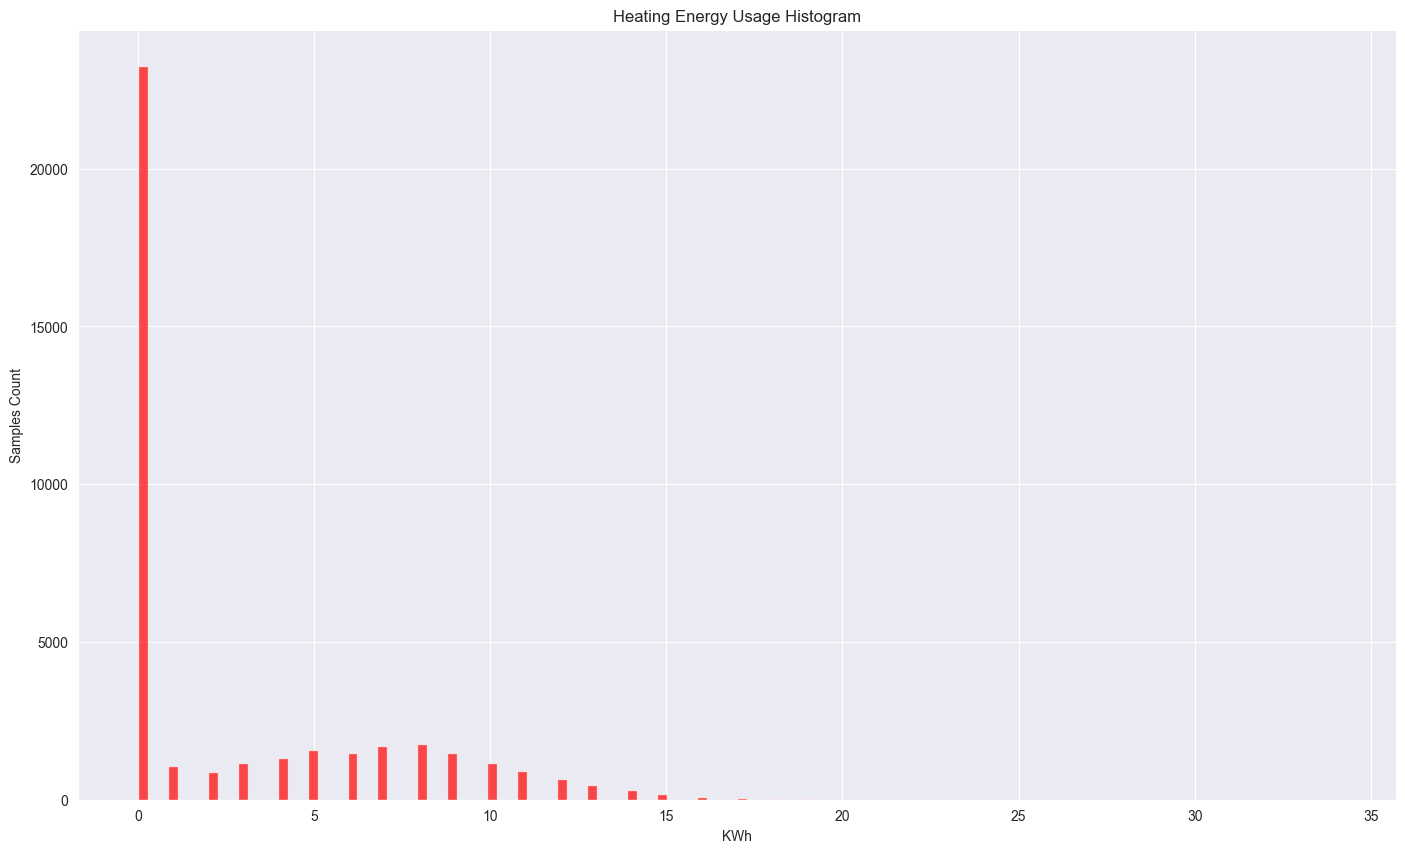

In [87]:
plt.figure()
plt.figure(figsize=(17, 10))
plt.hist(warm_data['fbh_warme'], bins=120,color='red',alpha=0.7)
plt.xlabel("KWh")
plt.ylabel("Samples Count")
plt.grid('--')
plt.title("Heating Energy Usage Histogram")